In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
full_data = gpd.read_file("./raw/DEC_lands/DEC_lands.shp")

In [7]:
full_data.columns = full_data.columns.str.lower()

In [8]:
full_data.head(15)

,objectid,category,unit,facility,class,ump,descriptio,region,county,url,source,update_,office,acres,lands_uid,greencert,shape_area,shape_len,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."
5,7,STATE FOREST,ULSTER 05,TURKEY POINT STATE FOREST,None,LOWER NEW ENGLAND WEST,FORST PARCEL,3,ULSTER,http://www.dec.ny.gov/lands/74170.html,DECRP,9/13,NEW PALTZ,140.455301,1518,Y,5.686449e+05,3662.188207,"POLYGON ((586993.630 4651974.155, 587105.101 4..."
6,8,FOR PRES DET PAR,LOT-74,LOT 74 FP DETACHED PARCEL,None,None,None,6,LEWIS,http://www.dec.ny.gov/,DECRP,11/05,LOWVILLE,238.825303,1520,N,9.669041e+05,3979.401824,"POLYGON ((448498.987 4820418.818, 448633.156 4..."
7,9,WILDLIFE MANAGEMENT,WAYNE 97,NORTHERN MONTEZUMA WMA,None,None,None,8,WAYNE,http://www.dec.ny.gov/outdoor/31112.html,DECRP,9/12,None,78.941533,1521,N,3.196013e+05,4837.019579,"POLYGON ((360203.099 4768463.522, 360398.649 4..."
8,10,FOREST PRESERVE,AFP,CRANBERRY LAKE WILD FOREST,WILD FOREST,CRANBERRY LAKE,None,6,ST. LAWRENCE,http://www.dec.ny.gov/lands/34715.html,ORIGINAL DOT RECD,12/96,POTSDAM,12.363714,1522,N,5.005552e+04,1185.271197,"POLYGON ((517029.156 4893366.500, 517025.219 4..."
9,11,STATE FOREST,MONTGOMERY 01,CHARLESTON STATE FOREST,None,CHARLESTON,None,4,MONTGOMERY,http://www.dec.ny.gov/lands/35832.html,DECRP,8/13,STAMFORD,18.653609,1523,Y,7.552068e+04,1208.546279,"POLYGON ((557738.181 4737804.833, 558042.747 4..."


In [10]:
data = full_data.loc[:, ["class", "county", "geometry"]].copy()

data["class"].value_counts()

WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: class, dtype: int64

In [14]:
# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
wild_lands = data[(data["class"] == "WILD FOREST") | (data["class"] == "WILDERNESS")].copy()
wild_lands.head()

,class,county,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


<AxesSubplot:>

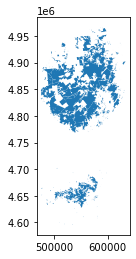

In [15]:
wild_lands.plot()

In [17]:
poi_data = gpd.read_file("./raw/Decptsofinterest.shp")


DriverError: Unable to open ./raw/Decptsofinterest.shx or ./raw/Decptsofinterest.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.